# Boletin 2


En este boletín vamos a hacer los 6 ejercicios del boletin de Física Nuclear del Grado de Física del año 2024/2025

# Ejercicio 5

a) Se nos pide calcular los valores de $Q_{gs}$ para la fision simétrica para todos los núcleos estables. Para calcular $Q_{gs}$ primero tenemos que saber que es $Q_{gs}$. El parámetro o valor $Q_{gs}$ de una reacción simétrica es básicamente la diferencia de las masas en reposo del nucleo original y los productos en el estado fundamental, tal que: 

$$ Q_{gs} = M(N,Z) - 2M(N/2,Z/2) $$

Ahora bien, para núcleos con $A$ y $Z$ impar. Cuando $A$ es impar (es decir, $Z$ es par y $N$ impar o vicerversa), el resultado es sencillo, ya que podemos escribir directamente: 

$$ \text{Si Z impar:} \quad Q_{gs} = M(N,Z) - M(N/2,Z//2+1)  - M(N/2,Z//2)  $$
$$ \text{Si N impar:} \quad Q_{gs} = M(N,Z) - M(N//2+1,Z/2)  - M(N//2,Z/2)  $$
donde // indica división entera (2.5//2=1,4.5//2==2...). Ahora lo interesante sucede cuando $Z$ y $N$ son impar a la vez, ya que las existen varias posibilidades: 
$$ \text{Z y N impares:} $$
$$ Q_{gs1} = M(N,Z) - M(N//2,Z//2)  - M(N//2+1,Z//2+1)  $$
$$ Q_{gs2} = M(N,Z) - M(N//2+1,Z//2)  - M(N//2,Z//2+1)  $$
que lógicamente darán valores distintos. Lo que sugerimos nosotros es hacer una media de la $Q_{gs1}$ y $Q_{gs2}$. ¿Por qué una media? Porque es la distribución menos sesgada con la información (la que maximiza la entropía) que tenemos (la única información que tenemos es que $P_{fisión \ simétrica}=P_{1}+P_{2}$) se corresponde precisamente a que ambas posibildades sean equiprobables (Luis Miguel Varela Cabo, Mecánica Estadística). En resumen: 


$$ \text{Si Z,N par:} \quad Q_{gs} = M(N,Z) - 2M(N/2,Z/2) $$
$$ \text{Si N par, Z impar:} \quad Q_{gs} = M(N,Z) - M(N/2,Z//2+1)  - M(N/2,Z//2)  $$
$$ \text{Si Z par, N impar:} \quad Q_{gs} = M(N,Z) - M(N//2+1,Z/2)  - M(N//2,Z/2)  $$
$$ \text{Si Z,N impar:} \quad Q_{gs} = M(N,Z) - \frac{1}{2} \left( M(N//2,Z//2) + M(N//2+1,Z//2+1) + M(N//2+1,Z//2) + M(N//2,Z//2+1) \right)  $$

Luego tenemos que hacer los cálculos para *todos* los núcleos estables, lo cual implica ser capaces de distinguir cuales son los núcleos estables, conocer su $N$ y $Z$ y su masa (y la masa de los productos). Esto lo hacemos a través de la tabla de datos https://www-nds.iaea.org/amdc/ame2016/nubase2016.txt que nos indica el $A$ y el tipo de núcleo, así como si es estable o no (apareciendo una marca 'stble' o un número que sería el tiempo de vida medio). Como podemos usar esta base de datos de manera completamente general sin limitarnos a usar "átomos estables", no nos vamos a poner esta limitación (que además hace el trabajo más sencillo). 

In [299]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [300]:

# Reimportar librerías tras reinicio

import re

# Ruta del archivo (tras resubida necesaria)
file_path = "MassGod.txt"

# Leer el archivo de texto
with open(file_path, "r") as file:
    lines = file.readlines()

# Lista para almacenar datos
data = []

for line in lines:
    parts = re.split(r"\s+", line.strip())
    #print(parts)
    if len(parts) < 6:
        continue

    try:
        A_code = parts[0]
        if not A_code.isdigit():
            continue
        A = int(A_code) 
        Z_code = parts[1]
        Z_code = Z_code.replace("W", "")  # 
        if not Z_code.isdigit():
            continue
        Z = int(Z_code)//10
        N = A - Z
    

        mass_str = parts[3].replace("#", "")
        mass = float(mass_str) 

        # Buscar vida media o "stbl"
        lifetime = "unknown"
        for i in range(len(parts)):
            if any(unit in parts[i] for unit in ['stbl', 's', 'ms', 'us', 'ns', 'ps', 'm', 'h', 'd', 'y']):
                lifetime = " ".join(parts[i:i+3])
                break

        data.append({
            "Z": Z,
            "N": N,
            "A": A,
            "Exceso_masa_keV": mass,
            "Lifetime": lifetime
        })

    except:
        continue
# Convertir a DataFrame
df = pd.DataFrame(data)

#print(df)
#df=pd.read_csv("Ej5.csv")
#print(df)



In [301]:
# Cargar el archivo CSV directamente, tal como está, sin manipular encabezados ni columnas
#df = pd.read_csv("Ej5.csv")

# Mostrar el DataFrame crudo tal cual
#print(df)

Z = df["Z"].to_numpy()
N = df["N"].to_numpy()
mass = df["Exceso_masa_keV"].to_numpy()
lifetime=df["Lifetime"].to_numpy()

Q=np.zeros((max(Z)+1,max(N)+1))
mass2 = np.zeros((max(Z)+1,max(N)+1))


for i in range(len(Z)+1):
    #if ('stbl' in lifetime[i] ):
    try: 
        # Z par, N par        
        mass2[Z[i],N[i]]=mass[i]
        Q[Z[i],N[i]]=mass[i]

        #print(mass[i])
        if (Z[i]%2==0 and N[i]%2==0):
            j=0
            while not(Z[i]/2==Z[j] and N[i]/2==N[j]):
                j+=1
                
            Q[Z[i],N[i]]+=-2*mass[j]
            #print(i)
        # Z impar, N par    
        elif (Z[i]%2!=0 and N[i]%2==0):    
            j=0
            while not(Z[i]//2+1==Z[j] and N[i]/2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
            j=0
            while not(Z[i]//2==Z[j] and N[i]/2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
            
        # Z par, N impar    
        elif (Z[i]%2==0 and N[i]%2!=0):    
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2+1==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
        # Z impar, N impar    
        else: 
            j=0
            while not(Z[i]//2+1==Z[j] and N[i]//2+1==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            j=0
            while not(Z[i]//2+1==Z[j] and N[i]//2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2+1==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            
        if (Z[i]==92 and N[i]==238-92):
            print("La masa del Uranio es:%.5e"%((238)*931.494+mass[i]/1000))    
            
            
            
            
    except IndexError:
        continue
        

La masa del Uranio es:2.21743e+05
La masa del Uranio es:2.21745e+05


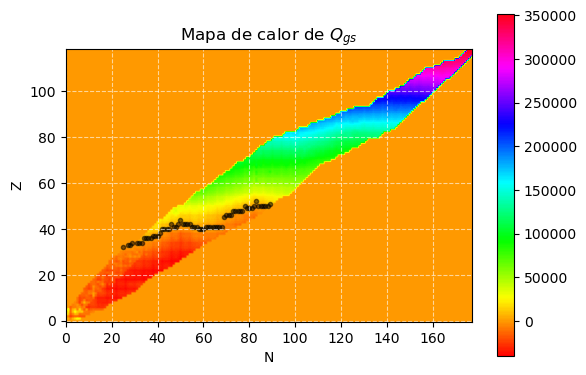

In [302]:


plt.figure(figsize=(6, 6))
plt.imshow(Q,cmap='hsv')
cbar = plt.colorbar(shrink=0.6)  # reduce la barra al 60% del alto del gráfico
plt.xlabel("N")
plt.ylabel("Z")
plt.gca().invert_yaxis()
plt.title('Mapa de calor de $Q_{gs}$')
plt.tight_layout()
plt.grid(linestyle="--",alpha=0.6,color="white")
plt.xlim(0,max(N))


Ncero=np.linspace(20,max(N),max(N)-19)
Zcero=np.zeros(len(Ncero))
aux=-1
for i in range(len(Ncero)): 
    j=0
    aux=-1
    while not(aux>0):
        try: 
            aux=Q[j,i+20]
            j+=1
        except IndexError:
            aux=0.0000001
    if aux>0.0001:
        Zcero[i]=j
for i in range(len(Zcero)):
    if (Zcero[i]>20 and Ncero[i]<90):
        plt.scatter(Ncero[i],Zcero[i],color="black",marker=".",alpha=0.5)      
plt.savefig("Qcolormap_nudat.pdf", dpi=300, bbox_inches='tight')

b) Ahora tenemos que dibujar por encima las líneas de Busaro-Gallone que marcan los límites que definen 3 regiones: las regiones de fisión antisimétrica, fisión simétrica y de fisión espotánea:

$$ 16.4 A < Z^2 < 47 A  $$

Para núcleos con $16.4A< Z^2$ tenemos que la fisión es antisimétrica, ya que la barrera presenta un máximo para estas fisiones, mientras que para $16.4 A <  Z^2 < 47 A$ la fisión simétrica presenta un mínimo en la barrera. Para átomos con $Z^2< 47 A$ la fisión es espontánea. 


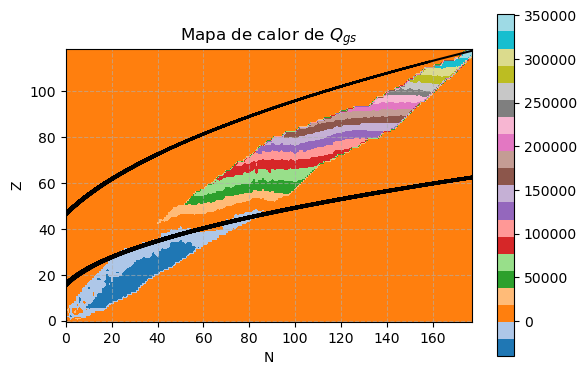

In [303]:

plt.figure(figsize=(6, 6))
plt.imshow(Q, cmap='tab20')
cbar = plt.colorbar(shrink=0.6)  # reduce la barra al 60% del alto del gráfico
plt.xlabel("N")
plt.ylabel("Z")
plt.gca().invert_yaxis()
plt.title('Mapa de calor de $Q_{gs}$')
plt.tight_layout()
plt.grid(linestyle="--",alpha=0.6)
plt.plot((Z**2-16.4*Z)/16.4,Z,color="black")
plt.plot((Z**2-47*Z)/47,Z,color="black")
plt.xlim(0,max(N))
plt.savefig("Qcolormap_nudat_BG.pdf", dpi=300, bbox_inches='tight')




# Ejercicio 6

El $^{238}$ U con $E^*=10$ MeV (energía de excitación) se fisiona en diferentes pedazos. El problema nos plantea estimar: la energía cinética total $TKE(Z)$ y la energía de exitación total $TXE(Z)$ en función del producto de la fisión. Posteriormente nos de estimar la multiplicidad de neutrones $\nu(Z)$, la distancia entre fragmentos en el punto de escisión, la energía intrínseca $E^{int}(Z)$ y la de deformación $E^{def}(Z)$ con las aproximaciones que creamos adecuados. Como dato nos dicen que la barrera de fisión $^{238}$ U es de 5.63 MeV. 

Un comentario breve que tenemos que hacer antes es el siguienet: como dato nos dan $\langle A \rangle$ que son números no enteros, mientras que nosotros sabemos que el número $A_i$ de un núcleo es un número entero. ¿Qué es entoncesb) Ahora tenemos que dibujar por encima las líneas de Busaro-Gallone que marcan los límites que definen 3 regiones: las regiones de fisión antisimétrica, fisión simétrica y de fisión espotánea:

$$ 16.4 A < Z^2 < 47 A  $$

Para núcleos con $16.4A< Z^2$ tenemos que la fisión es antisimétrica, ya que la barrera presenta un máximo para estas fisiones, mientras que para $16.4 A <  Z^2 < 47 A$ la fisión simétrica presenta un mínimo en la barrera. Para átomos con $Z^2< 47 A$ la fisión es espontánea. 
 $\langle A \rangle$? Es, pues, un promedio de todos los posibles números másicos emitidos para cada $Z$.

Por ejemplo $Z=30$ se podría emitir con $A=74$ o con $A=79$ (con $\langle E^* \rangle= 14.7 MeV $) E. Pellereau *et all*  [#e#]<Accurate isotopic fission yields of electromagnetically induced fission of 238 U measured in inverse kinematics at relativistic energies>, cada uno con cierta probabilidad.

En general los valores como TKE no son valores fijos, siguen una distribución, y lo que damos es un valor medio. 

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Vamos a imprimir los datos relevantes del U238

ZU=92           # Numero de protones 
NU=238-ZU       # Numero de neutrones
Eex=10          # Energia de excitación 
MU=2.21743e+05  # Masa del uranio en MeV


In [305]:
# LEEMOS LOS DATOS GUARDADOS EN UN TXT:

import re

# Ruta del archivo (tras resubida necesaria)
file_path = "Ej6.txt"

# Leer el archivo de texto
with open(file_path, "r") as file:
    lines = file.readlines()

# Lista para almacenar datos
data = []

for line in lines:
    try:
        parts = re.split(r"\s+", line.strip())

        Z1 = int(parts[0])
        A1 = float(parts[1])
        cuentas1=float(parts[2])
        beta1=float(parts[3])
        
        Z2 = int(parts[4])
        A2 = float(parts[5])
        cuentas2=float(parts[6])
        beta2=float(parts[7])
        
        #print(parts)
        
        data.append({
                "Z": Z1,
                "A": A1,
                "cuentas": cuentas1,
                "beta": beta1
            })
        data.append({
                "Z": Z2,
                "A": A2,
                "cuentas": cuentas2,
                "beta": beta2
            })
    except IndexError:
        continue

data.append({
    "Z": 46,
    "A": 114.9,
    "cuentas": 229,
    "beta": 0.0375
    })
# Convertir a DataFrame
df = pd.DataFrame(data)
#print(df)

Z=df["Z"].to_numpy()
A=df["A"].to_numpy()
cuentas=df["cuentas"].to_numpy()
beta=df["beta"].to_numpy()

datos = list(zip(Z, A, cuentas, beta))

# Ordena por el primer elemento de cada par (protones)
datos.sort()  # ordena por defecto por el primer elemento

# Desempaqueta de nuevo
Z_or, A_or, cuentas_or, betas_or = zip(*datos)

# Si los quieres como listas
Z = np.array(list(Z_or))
A = np.array(list(A_or))
cuentas = np.array(list(cuentas_or))
beta = np.array(list(betas_or))



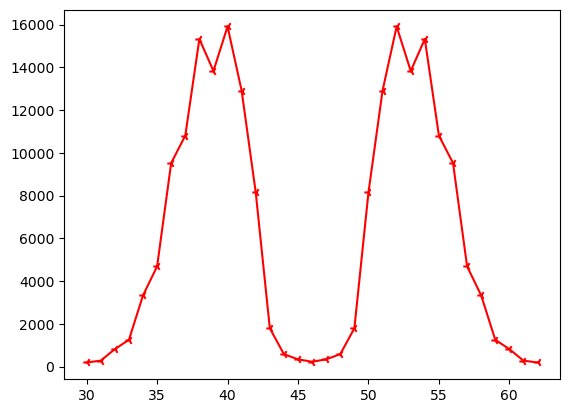

In [306]:
plt.scatter(Z,cuentas,marker="3",color="red")
plt.plot(Z,cuentas,color="red")

¿Como calculamos TKE y TXE, si solo conocemos la energía de excitación, la masa inicial de la partícula,  que $Z$ y $A$ se conservan y $Z_1$ y $Z_2$ ? Pues bien, el cálculo se hace a través de la conservación del momento. Veamos todas las ecuaciones que conocemos. Tenemos 4 variables desconocidas (ya que conocido $A_1$ conocemos $M_1$ y conocido $A_2$ conocemos $M_2$ y viceversa): 

$$ \text{Conservación número másico:} \qquad A = A_1 + A_2 $$
$$ \text{Conservacion de la energía:} \qquad  E^* + M(Z,A) =\underbrace{T_1 + T_2}_{TKE} + M_1(Z_1,A_1) + M_2(Z_2,A_2) + TXE  $$
$$ \text{Conservación momento:}  \qquad (T_1 + M_1)^2 - M_1^2 = (T_2 + M_2)^2 - M_2^2  \longrightarrow \text{No relativista} \longrightarrow T_1 M_1 = T_2 M_2 $$

Sin embargo, cuando estabamos calculando la energía cinética se nos dijo que $\beta$ era la velocidad media entre la velocidad de la luz, y no el factor cuadrupolar. Con esto podemos calcular fácilmente $TKE$ ya que la energía cinética sería:

$$ T_{1d} = (\gamma_1-1) M_1 \approx \frac{1}{2} M_1 v_1^2 \qquad \quad T_{2d} = (\gamma_2 - 1) M_2 \approx \frac{1}{2} M_2 v_2^2  $$

donde $\gamma=1/\sqrt{1-\beta^2}$  y $v_i = \beta_i c$. Le llamamos $T_{1d}$ ya que esta sería la energía cinética del *fragmento medido*, y por tanto no es la energía cinética de *los fragmentos en el momento de escisión*. Para calcular esto último tenemos que tener en cuenta que la emisión de neutrones aumenta la energía cinética de nuestras partículas, aunque tan poco que no hace falta que lo tengamos en cuenta, ya que si nos fijamos:

$$ T_{1d} - T_1 = \frac{p_n^2}{2 M_{1d}} =  \frac{m_n}{M_{1d}} T_n $$

teniendo que $ m_n/M_{1d} <  0.01 $ para nuestro fragmento más pequeño, es decir, podemos aproximar 


$$ T_{1d} \approx T_d $$

al super un error de menos del uno por ciento e idém para el 2. Nos parece importante comentar dicha la aproximación.



También podemos calcular $TKE$ usando la fórmula dada por Zhao *et al* (handbook), que es: 

$$ \text{Simetrica:} \quad  0.1173 \times Z^2/(\langle A \rangle )^{1/3} + 7.5  \ \text{MeV}  $$

$$ \text{Antisimetrica:} \quad  0.1217 \times Z^2/(\langle A \rangle )^{1/3} + 3.5  \ \text{MeV}  $$

que era lo que teníamos pensado para calcular antes de que se nos comentará que $\beta$ era la velocidad en unidades de $c$. Ya que la conocemos, podemos hacer un promedio para ver si efectivamente coincide con la fórmula de Zhao (handbook), que da:  
$$\text{Simetrico:} \ \langle TKE \rangle_{\text{Zhao}} =  \qquad \text{Antisimetrico:} \ \langle TKE \rangle_{\text{Zhao}} =  $$ 

y como sabemos $\langle Q_{g} \rangle$ para cada nucleón, es fácil de calcular $\langle TXE \rangle$, ya que por conservación de la energía:

$$ \langle TXE \rangle =  Q_{g} - E^* - \langle TKE \rangle   $$

Referencias: 

- Zhao et al.


<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_8080/674768736.py:9: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Mapa de calor de $\Delta(Z,N)$')


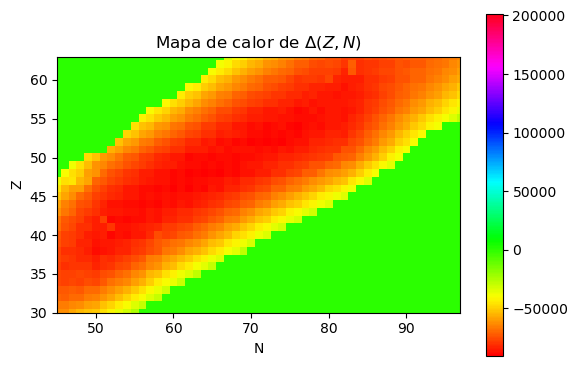

In [319]:
# Aquí hacemos 

plt.figure(figsize=(6, 6))
plt.imshow(mass2, cmap='hsv')
cbar = plt.colorbar(shrink=0.6)  # reduce la barra al 60% del alto del gráfico
plt.xlabel("N")
plt.ylabel("Z")
plt.gca().invert_yaxis()
plt.title('Mapa de calor de $\Delta(Z,N)$')
plt.tight_layout()
plt.ylim(30,63)
plt.xlim(75-30,160-63)
plt.savefig("Deltacolormap.pdf", dpi=300, bbox_inches='tight')




Ahora vamos a calcular la multiplicidad de neutrones $\langle \nu \rangle$ para cada fisión, y luego podemos hacer un promedio del total. La manera de calcularlo es muy sencilla, ya que solo hay que el número de protones y neutrones en el experimento es conservado, tal que:

$$ N  = (\langle A_1 \rangle - Z_1) +  (\langle A_2 \rangle - Z_2) + \langle \nu (Z_1,Z_2) \rangle  $$
de lo que se deduce quecada

$$  \langle \nu (Z_1,Z_2) \rangle =  N - (\langle A_1 \rangle - Z_1) -  (\langle A_2 \rangle - Z_2) $$
siendo todos datos que conozcamos. Sin embargo con esto no podemos saber cual es la multiplicidad $\nu_i$ de cada uno de los fragmentos. Lo único que podemos hacer para calcular $\nu_i$ de cada fragmento es ver cuan lejos están de $S_n$  núcleo $(Z_i,\langle A_i \rangle - Z_i)$ (calculando a cuantos ''neutrones'' están de distancia). Con hacerlo para un átomo fisionador sería suficiente, ya que el otro se obtendría con la diferencia. 

In [308]:
# Aquí se calcula todo sobre las multiplicidaes de neutrinos

Ahora solo tenemos que calcular la distancia entre fragmentos en el punto de escisión, que denotamos por $d$. Como ya hemos calculado $TKE$ sin necesidad de $d$, podemos despejar $d$ con las siguientes ecuaciones: 


$$ TKE = 1.44 \frac{Z_1Z_2}{R_1 + R_2 + d} \qquad R_i \approx r_0  \langle A_i^{1/3}  \rangle $$
donde hemos supuesto que $R_i$ es ese radio. Esta expresión tiene el orgien en la fuerza coulimbiana de repulsión que obtienen inmediatamente los dos núcleos al ser objetos cargados tan próximos. Así pues solo queda despejar:

$$ d \approx \frac{1.44 Z_1 Z_2}{TKE} - r_0 (\langle A_1 \rangle ^{1/3} + \langle A_2\rangle^{1/3})  $$
dodne $r_0=1.2$ fm. Lógicamente podríamos obtener un resultado mucho mas digno si tuvieramos en cuenta la deformación de cada átomo, la cual puede llegar a ser bastante grande en el momento de la escisión.

In [309]:
# Aquí se calcula todo lo que tnga que ver con el pto. de escicsion



Aquí vamos a comentar como obtener la energía intrínseca $E^{int}(Z)$ y la energía  de deformación $E^{def}(Z)$. Conociendo la altura de la barrera de fisión $BF=5.63$ MeV y conociendo la energía de excitación del $^{238} \text{U}$  $E^*=10$ MeV se puede conocer la energía que tenemos disponible por encima de la barrera $E^{bf} = E^*- BF$. La energía disponible en el momento de la escisión se puede separar en tres partes: la energía intrínseca, la energía de estados colectivos y la energía de deformación:

$$ TXE = E^{int} + E^{col} + E^{def} $$

la energía intrínseca se puede calcular a partir de la energía disponible por encima de la barrera y la energía disipada:

$$ E^{int} = E^{bf} + E^{dis} $$

pudiendo calcular esta última a través del efecto par-impar del que hablaremos más adelante. Para calcular $E^{def}$ tendremos que saber $E^{col}$ y $E^{int}$. Este último ya hemos dicho que lo podemos calcular, mientras que $E_{col}$ también se puede calcular a partir de las excitaciones de partículas independientes. Para calcularlo usamos:

$$  E^{col} = $$

de tal modo que efectivamente: 

$$  E^{def} = TXE - E^{int} - E^{col}  $$



¿Por qué es importante calcularlo al momento de la escisión? -> Puede ser interesante.
Frases intenresntas
 - "First the intrinsic excitation energy is statistically partitioned between the fragments and then one calculates for each fragment the intrinsic excitation coming from the fragment’s deformation and from the damping of collective modes" Bea.
 - "The deformation and collective energies are dissipated into intrinsic excitation energy after scission, when the fragments are not in contact anymore." Bea.
 - "The excitation energy stored in one of the collective normal modes (angular-momentum bearing and others) [9] is shared between the fragments according to the corresponding coordinated motions of
the nascent fragments. It is dissipated into intrinsic excitations well after scission. The deformation of the fragments at scission is strongly favored by the mutual Coulomb repulsion
of the nascent fragments that induces a considerable elongation of their shapes. The energy stored in deformation is transformed into excitation energy of the fragments when they snap
back to their ground-state deformation after separation. Therefore, the deformation and collective energies, which largely contribute to the TXE, are released well after scission and
cannot be exchanged between the fragments."




Referencias

- Final excitation energy of fission fragments, Karl-Heinz Schmidt and Beatriz Jurado
- General Description of Fission Observables: GEF Model Code

Para calcular $E^{int}$ usamos que:

$$ E_{int} = - G \log \delta_0 $$

donde 

$$ \delta_0  =  \frac{\sum_{par} Y(Z_i) - \sum_{impar}Y (Z_i)}{\sum Y(Z_i)} $$
tal que: 

$$ Y(Z_i) = \frac{N(Z_i)}{N_T} $$
siendo $N(Z_i)$ el número de cuentas del átomo $Z_i$ y $N_T$ el número de cuentas totales, la suma de todos. Así tenemos que:

$$ \delta_0 = 0.0806 \quad E_{dis} = 10.07 \ \text{MeV} \quad E_{bf} = 4.37 \ \text{MeV} \quad  E_{int}= 14.44  \ \text{MeV} $$

Frases interesantes: 

 - Since each event leads to two fragments, the yields are normalized so that $\sum Y = 2$
Referencias: 
 - Prompt Fission Neutron Spectra of Actinides (R. Capote).

Ahora solo quedaría calcular $E_{col}$ para obtener $E_{def}$, tal que si:

$$ E_{col} =  $$
tenemos 

$$ E_{def} =  $$

In [310]:
# Aquí todo con la energía intrínseca

Eex = 10 # energía de excitacion
BF = 5.63 # energia de la barrera

if Z[0]%2==0:
    m=1
else:
    m=-1
  
delta=0  

for i in range(len(cuentas)):
    if i%2==0:
        delta+=cuentas[i]*m
    else: 
        delta+=-cuentas[i]*m
        
delta0=delta/sum(cuentas)
print("delta0=",delta0)
print("Edis=",-4*np.log(delta0))
print("Ebf=",Eex-BF)
print("Eint=",Eex-BF-4*np.log(delta0))



        

        

delta0= 0.08063635771836614
Edis= 10.071222571448425
Ebf= 4.37
Eint= 14.441222571448424


In [311]:
# Aquí todo con la energía de deformacion